In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [ ]:
# sklearn modules for data preprocessing:

In [2]:
customer_churn=pd.read_csv("C:\\Users\\mvnvi\\Downloads\\customer_churn.csv")

In [4]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
c_15=customer_churn.iloc[:,14]
c_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [6]:
c_random=customer_churn[(customer_churn['gender']=='Male') & (customer_churn['SeniorCitizen']==1) & (customer_churn['PaymentMethod']=='Electronic check')]
c_random.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [7]:

senior_male_electronic=customer_churn[(customer_churn['gender']=='Male') & (customer_churn['SeniorCitizen']==1) & (customer_churn['PaymentMethod']=='Electronic check')]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [8]:

customer_total_tenure=customer_churn[(customer_churn['tenure']>70) | (customer_churn['MonthlyCharges']>100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [9]:
two_mail_yes=customer_total_tenure=customer_churn[(customer_churn['Contract']=='Two year') & (customer_churn['PaymentMethod']=='Mailed check') & (customer_churn['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [10]:
customer_333=customer_churn.sample(n=333)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
681,7501-IWUNG,Female,0,Yes,Yes,61,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),73.80,4616.05,No
3590,9447-YPTBX,Female,0,Yes,No,50,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.85,943.1,No
3481,7339-POGZN,Female,0,No,No,4,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,50.70,214.55,No
5724,8042-JVNFH,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,71.35,71.35,Yes
6589,3118-UHVVQ,Female,0,Yes,No,68,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.80,1911.5,No


In [11]:
len(customer_333)

333

In [12]:
#count of levels of churn column
customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [13]:
%matplotlib inline

Text(0.5, 1.0, 'Distribution of Internet Service')

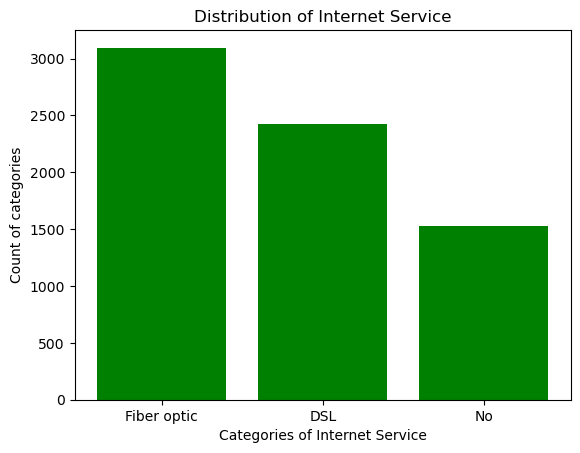

In [15]:
#bar-plot for 'InternetService' column
plt.bar(customer_churn['InternetService'].value_counts().keys().tolist(),customer_churn['InternetService'].value_counts().tolist(),color='Green')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')

Text(0.5, 1.0, 'Distribution of tenure')

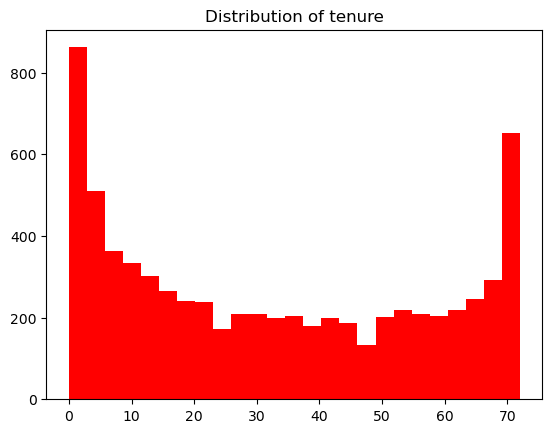

In [16]:
#histogram for 'tenure' column
plt.hist(customer_churn['tenure'],color='Red',bins=25)
plt.title('Distribution of tenure')

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

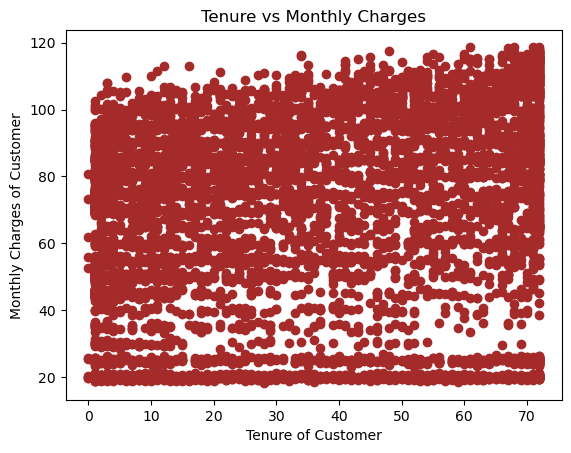

In [17]:
#scatterplot 
plt.scatter(x=customer_churn['tenure'],y=customer_churn['MonthlyCharges'],color='brown')
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges of Customer')
plt.title('Tenure vs Monthly Charges')

<AxesSubplot:title={'center':'tenure'}, xlabel='[Contract]'>

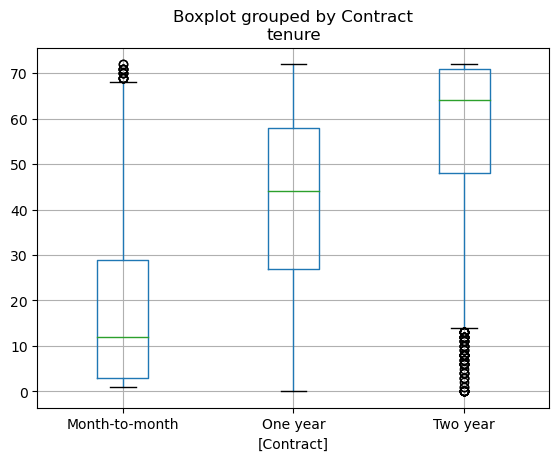

In [18]:
#Box-plot
customer_churn.boxplot(column='tenure',by=['Contract'])

In [ ]:
# linear regression

In [19]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [20]:
x=pd.DataFrame(customer_churn['tenure'])
y=customer_churn['MonthlyCharges']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [22]:
#building the model
from sklearn.linear_model import LinearRegression
simpleLinearRegression = LinearRegression()
simpleLinearRegression.fit(x_train,y_train)

LinearRegression()

In [23]:
#predicting the values
y_pred = simpleLinearRegression.predict(x_test)

In [24]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
rmse

29.394584027273893

In [ ]:
# logestic regression

In [25]:
x=pd.DataFrame(customer_churn['MonthlyCharges'])
y=customer_churn['Churn']


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.65,random_state=0)

In [27]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_pred = logmodel.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_pred,y_test),accuracy_score(y_pred,y_test)

(array([[1815,  651],
        [   0,    0]], dtype=int64),
 0.7360097323600974)

In [ ]:
#Multiple logistic regression

In [30]:
x=pd.DataFrame(customer_churn.loc[:,['MonthlyCharges','tenure']])
y=customer_churn['Churn']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=0)

In [32]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred = logmodel.predict(x_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[934 107]
 [212 156]]
              precision    recall  f1-score   support

          No       0.82      0.90      0.85      1041
         Yes       0.59      0.42      0.49       368

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.76      0.77      0.76      1409



In [ ]:
#Decision tree

In [35]:
x=pd.DataFrame(customer_churn['tenure'])
y=customer_churn['Churn']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20) 

In [37]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
y_pred = classifier.predict(x_test) 

In [39]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_pred))   
print(accuracy_score(y_test, y_pred))  

[[953 100]
 [246 110]]
0.7544357700496807


In [ ]:
# random forest

In [40]:
x=customer_churn[['tenure','MonthlyCharges']]
y=customer_churn['Churn']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)  

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
y_pred=clf.predict(x_test)

In [44]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7381121362668559
